In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#讀取資料集
import pandas as pd
import numpy as np
import re
import string
df=pd.read_csv('/content/drive/MyDrive/守燦_碩士論文實作/CCPD/CCPD_EDA.csv')
display(df)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
#觀察標題的敘述統計量
titles = [text for text in df.title]
max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 6335
Max length of the titles: 53
Mean length of the titles: 10.496448303078138


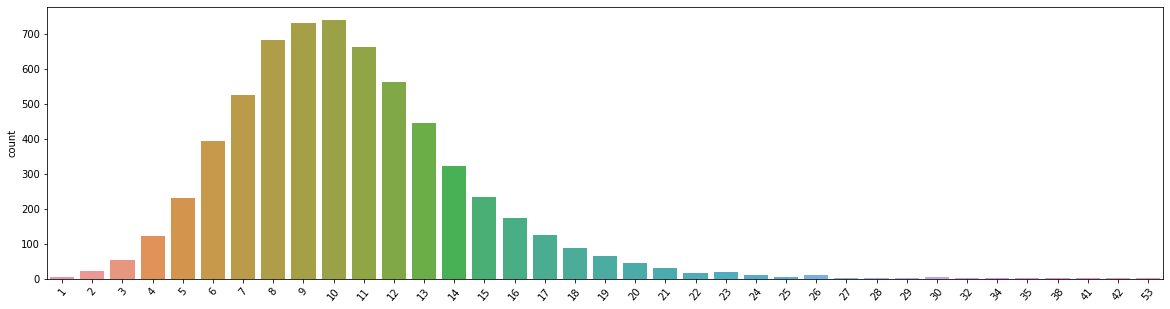

In [4]:
#可視化標題字數的平均次數
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [5]:
#內文的平均長度
texts = [text for text in df.text]
max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 776.3007103393844


In [6]:
#標籤轉換(REAL:0,FAKE:1)並打散資料集的順序
from sklearn.utils import shuffle
df = df.drop(['text'],axis=1)
df = shuffle(df).reset_index(drop=True)
df["label"]=df.label.map({'REAL':0,'FAKE':1})
display(df)

,title,label
0,Hillary and the Ghosts of Watergate,1
1,Detroit women’s Halloween decorations depict ‘...,1
2,"Black Agenda Radio for Week of Nov. 7, 2016",1
3,Hillary Clinton: 'unpatriotic' Donald Trump's ...,0
4,Pieczenik “Rogue FBI Agents and Wikileaks are ...,1
...,...,...
6330,Kerry tells Capitol Hill critics of Iran nucle...,0
6331,"Hillary Clinton Wants a Strong Russia. Wait, w...",1
6332,Report: Obama Administration Makes 'No Progres...,0
6333,Scott Walker: Wall on Canadian Border Worth Re...,0


In [7]:
#字詞正則化
def irrelevant(text):
    return re.sub('[^a-zA-Z0-9]',' ',text)
df['title']=df['title'].apply(irrelevant)
print(df['title'].head())

0                  Hillary and the Ghosts of Watergate
1    Detroit women s Halloween decorations depict  ...
2          Black Agenda Radio for Week of Nov  7  2016
3    Hillary Clinton   unpatriotic  Donald Trump s ...
4    Pieczenik  Rogue FBI Agents and Wikileaks are ...
Name: title, dtype: object


In [8]:
#將字母轉換為小寫
def lowering(text):
    return str(text).lower()
df['title']=df['title'].apply(lowering)
print(df['title'].head())

0                  hillary and the ghosts of watergate
1    detroit women s halloween decorations depict  ...
2          black agenda radio for week of nov  7  2016
3    hillary clinton   unpatriotic  donald trump s ...
4    pieczenik  rogue fbi agents and wikileaks are ...
Name: title, dtype: object


In [9]:
#分割資料集(訓練:60%、測試:20%、驗證20%)
train,validate,test=np.split(df.sample(frac=1),[int(.6*len(df)), int(.8*len(df))])
train_df=train.reset_index(drop=True)
val_df=validate.reset_index(drop=True)
test_df=test.reset_index(drop=True)
print('訓練集維度: ',train_df.shape)
print('測試集維度: ',val_df.shape)
print('驗證集維度: ',test_df.shape)

訓練集維度:  (3801, 2)
測試集維度:  (1267, 2)
驗證集維度:  (1267, 2)


In [10]:
#將所有資料集另存
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)
df=pd.concat([train_df, val_df, test_df])
display(df)

,title,label
0,vote vote vote,1
1,bergdahl s platoon mates head of joint chiefs...,0
2,north carolina hillary supporter brags on face...,1
3,what happened in 2014 quebec tried to pass a...,1
4,new york prison escape worker questioned sou...,0
...,...,...
1262,lynch vote deal reached on human trafficking bill,0
1263,tony blair suggests a second referendum to rev...,1
1264,why hillary won t unleash wwiii information,1
1265,hillary will go to prison not the oval office...,1


In [11]:
#安裝ALBERT套件
!pip install ktrain
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from sklearn.model_selection import train_test_split
X=df['title']
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [13]:
MODEL_NAME = 'albert-base-v2'
t = text.Transformer(MODEL_NAME, maxlen=400, classes=np.array(['0','1']))
trn = t.preprocess_train(np.array(X_train),np.array(y_train))
val = t.preprocess_test(np.array(X_test), np.array(y_test))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

/usr/local/lib/python3.9/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 23


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 23


In [14]:
learner.fit_onecycle(1e-5,1)



begin training using onecycle policy with max lr of 1e-05...
238/238 [==============================] - 347s 1s/step - loss: 0.6070 - accuracy: 0.6706 - val_loss: 0.5125 - val_accuracy: 0.7640


In [15]:
predictor=ktrain.get_predictor(learner.model,preproc=t)

In [16]:
metrics=learner.validate(class_names=predictor.get_classes())

80/80 [==============================] - 13s 118ms/step
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1292
           1       0.74      0.81      0.77      1242

    accuracy                           0.76      2534
   macro avg       0.77      0.76      0.76      2534
weighted avg       0.77      0.76      0.76      2534

